# Linear Regression models

Importing all neccesary libraries:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math
import time

Formula for points generation: *y = b1 * x + b0 + e*, where e ~ N(u, sigma)

Generating linear equation **x** values, coefficients **b** and random errors **e**:

In [2]:
np.random.seed()

x = np.arange(-10, 10, .01)

b = np.array([round(np.random.uniform(-2, 2), 2) for i in range(2)])

mean = round(np.random.uniform(-2, 2), 2)
deviation = round(np.random.uniform(1, 4), 2)
e = np.array([np.random.normal(mean, deviation) for i in range(len(x))])

print("Generated equation: y={0}x".format(b[1]) + "{:+}+e".format(b[0]) + ", where e ~ N({0}, {1})".format(mean, deviation))

Generated equation: y=0.18x-1.44+e, where e ~ N(-0.47, 1.95)


There are three different methods to find the regression line:
1. *using matrix calculations*
2. *using gradient descent*
3. *using scikit-learn library*

Calculating target **y** values by using matrix multiplication:

In [3]:
_x = np.array([[1 for i in range(len(x))], x.tolist()]).T
y = np.dot(_x, b) + e

Calculating target **y** values by using loop:

In [4]:
y = [b[1] * i + b[0] + j for i, j in zip(x, e)]

Drawing generated points:

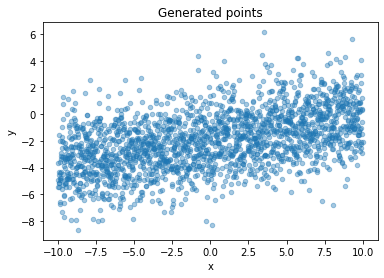

In [5]:
plt.title("Generated points")
plt.scatter(x, y, s=20, alpha=0.4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Finding correlation coefficient between **x** and **y**:

In [6]:
print("Correlation coefficient between x and y: {}".format(round(np.corrcoef(x, y)[0][1], 3)))

Correlation coefficient between x and y: 0.476


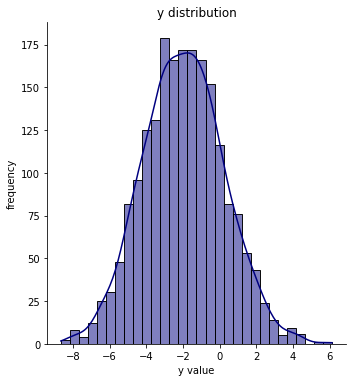

In [7]:
sns.displot(y, kde=True, bins=30, color="navy")
plt.title("y distribution")
plt.xlabel("y value")
plt.ylabel("frequency")
plt.show()

Some functions needed for further calculations:

In [8]:
def MSE(y_target, y_pred): # mean square error
    assert len(y_target) == len(y_pred)
    return sum([(y1 - y2)**2 for y1, y2 in zip(y_target, y_pred)])

def b0_grad(y_target, y_pred): # gradient for b0 param (intercept)
    assert len(y_target) == len(y_pred)
    return -2 * sum([(y1 - y2) for y1, y2 in zip(y_target, y_pred)])

def bi_grad(y_target, y_pred, xi): # gradient for bi coefficient
    assert len(y_target) == len(y_pred)
    assert len(y_target) == len(x)
    return -2 * sum([x * (y1 - y2) for y1, y2, x in zip(y_target, y_pred, xi)])

def determination_coeff(y, y_pred): # model evaluation
    y_mean = sum(y) / len(y)
    r = 1 - (MSE(y, y_pred) / MSE(y, [y_mean for i in range(len(y))]))
    return r

def get_residuals(y_target, y_pred):
    assert len(y_target) == len(y_pred)
    return [y1 - y2 for y1, y2 in zip(y_target, y_pred)]

def get_prediction(x, b_pred):
    y_pred = [b_pred[1] * i + b_pred[0] for i in x]
    return y_pred

def print_result(b_pred, r, time):
    print("Predicted b0: {}".format(round(b_pred[0], 3)))
    print("Predicted b1: {}".format(round(b_pred[1], 3)))
    print("Determination coefficient R^2: {0}".format(round(r, 5)))
    print("Elapsed time: {} ms".format(round(time, 3)))

Finding the target regression line using matrix calculations (**method 1**):

In [9]:
start = time.time()
_x_t = _x.T
b_pred_1 = np.dot(np.dot(np.linalg.inv(np.dot(_x_t, _x)), _x_t), y)
stop = time.time()

y_pred_1 = get_prediction(x, b_pred_1)
r_1 = determination_coeff(y, y_pred_1)
elapsed_time_1 = (stop - start) * 1000
print_result(b_pred_1, r_1, elapsed_time_1)

Predicted b0: -1.964
Predicted b1: 0.18
Determination coefficient R^2: 0.22657
Elapsed time: 0.998 ms


Finding the target regression line using gradient descent (**method 2**):

In [11]:
start = time.time()

save_step = 5
epoсhs = 100000
alpha = 0.00001
stop_diff = 0.01

b_history = []
errors = [math.inf]
b_pred_2 = np.array([np.random.uniform(-5, 5) for i in range(2)])

for i in range(epoсhs):
    y_pred_2 = get_prediction(x, b_pred_2)
    errors.append(MSE(y, y_pred_2))
    if abs(errors[-1] - errors[-2]) < stop_diff:
        break
    b_pred_2[0] -= alpha * b0_grad(y, y_pred_2)
    b_pred_2[1] -= alpha * bi_grad(y, y_pred_2, x)
    if i % save_step == 0:
        b_history.append([b_pred_2[0], b_pred_2[1]])
        
stop = time.time()
elapsed_time_2 = (stop - start) * 1000
completed_epochs = i + 1
b_history.append([b_pred_2[0], b_pred_2[1]])
y_pred_2 = get_prediction(x, b_pred_2)
r_2 = determination_coeff(y, y_pred_2)
print("Completed {} epochs".format(completed_epochs))
print_result(b_pred_2, r_2, elapsed_time_2)
#print("Saved temporary points:", len(b_history))

Completed 168 epochs
Predicted b0: -1.957
Predicted b1: 0.18
Determination coefficient R^2: 0.22656
Elapsed time: 721.96 ms


Finding the target regression line using scikit-learn library (**method 3**):

In [17]:
x_reshaped = x.reshape(-1, 1)

start = time.time()
model = LinearRegression().fit(x_reshaped, y)
stop = time.time()

b_pred_3 = [model.intercept_, model.coef_[0]]
y_pred_3 = get_prediction(x, b_pred_3)
r_3 = model.score(x_reshaped, y)
elapsed_time_3 = (stop - start) * 1000
print_result(b_pred_3, r_3, elapsed_time_3)

Predicted b0: -1.964
Predicted b1: 0.18
Determination coefficient R^2: 0.22657
Elapsed time: 0.998 ms


Illustration of mean square error values during training model by using gradient descent:

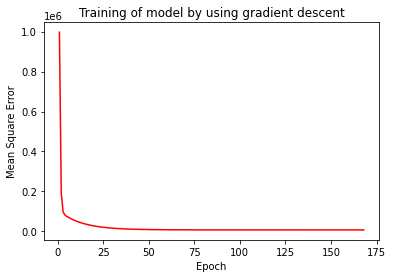

In [18]:
plt.plot([i + 1 for i in range(completed_epochs)], errors[1:], 'r')
plt.title("Training of model by using gradient descent")
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
#plt.xscale("log")
#plt.xlim(0, 200)
#plt.ylim(0, 1000)
plt.show()

Showing the result lines:

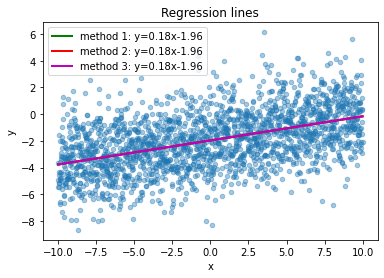

In [19]:
plt.scatter(x, y, s=20, alpha=0.4)

precision = 2
b_pred_1r = [round(elem, precision) for elem in b_pred_1]
b_pred_2r = [round(elem, precision) for elem in b_pred_2]
b_pred_3r = [round(elem, precision) for elem in b_pred_3]

plt.plot(x, [b_pred_1r[1] * i + b_pred_1r[0] for i in x], "g", linewidth=2, label="method 1: y="+str(b_pred_1r[1])+"x{:+}".format(b_pred_1r[0]))
plt.plot(x, [b_pred_2r[1] * i + b_pred_2r[0] for i in x], "r", linewidth=2, label="method 2: y="+str(b_pred_2r[1])+"x{:+}".format(b_pred_2r[0]))
plt.plot(x, [b_pred_3r[1] * i + b_pred_3r[0] for i in x], "m", linewidth=2, label="method 3: y="+str(b_pred_3r[1])+"x{:+}".format(b_pred_3r[0]))
plt.title("Regression lines")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Creating animation of finding the target line by using gradient descent:

In [20]:
animation_time = 3000 # ms

def animate(j):
    line.set_data(x, [b_history[j][1] * i + b_history[j][0] for i in x])

fig, ax = plt.subplots()
plt.scatter(x, y, s=20, alpha=0.4)
plt.title("Searching the regression line by gradient descent")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(min(y) * 1.1, max(y) * 1.1)
line, = ax.plot(x, [b_history[0][1] * i + b_history[0][0] for i in x], "r", linewidth=2)

ani = animation.FuncAnimation(fig, animate, frames=range(len(b_history)), interval=animation_time/len(b_history), repeat=True)
plt.close()
HTML(ani.to_html5_video())

Showing the residuals for all predicted y values:

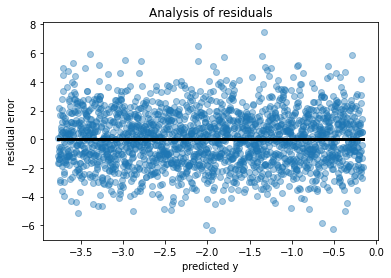

In [21]:
residuals = get_residuals(y, y_pred_1)
plt.scatter(y_pred_1, residuals, alpha=0.4)
plt.plot([min(y_pred_1), max(y_pred_1)], [0, 0], color='black', linewidth=3)
plt.title("Analysis of residuals")
plt.xlabel("predicted y")
plt.ylabel("residual error")
plt.show()

Showing the residuals distribution:

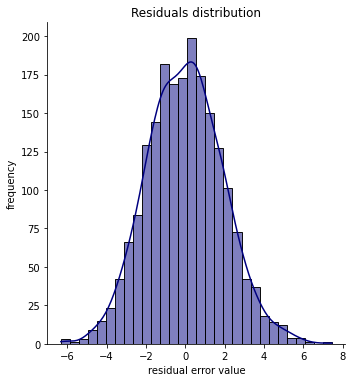

In [22]:
sns.displot(residuals, kde=True, bins=30, color="navy")
plt.title("Residuals distribution")
plt.xlabel("residual error value")
plt.ylabel("frequency")
plt.show()
plt.show()

Table for comparing the results given by two methods:

In [23]:
df = pd.DataFrame([["matrix caclulations", elapsed_time_1, b_pred_1[0], b_pred_1[1], r_1], 
                   ["gradient descent", elapsed_time_2, b_pred_2[0], b_pred_2[1], r_2], 
                   ["scikit-learn library", elapsed_time_3, b_pred_3[0], b_pred_3[1], r_3]],
                  columns = ["method", "train time [ms]", "b0", "b1", "R^2"])
HTML(df.to_html(index=False))

method,train time [ms],b0,b1,R^2
matrix caclulations,0.997543,-1.964223,0.180454,0.226571
gradient descent,721.960068,-1.956718,0.180456,0.226559
scikit-learn library,0.997782,-1.964223,0.180454,0.226571
